## 신용카드 사용자 연체 예측하기
### credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0,1,2)
> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [17]:
df['credit'].value_counts()

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64

In [18]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [22]:
# 모든 사람이 핸드폰을 가지고 있음을 알 수 있게 된다.
df['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    26457
Name: count, dtype: int64

### 가정 1. work_phone이 1이면 credit이 낮을 것이다.

업무용 폰을 가지고 있으면 신용 비율이 높을 것이다.

In [67]:
test = df.copy()

In [68]:
test['credit'] = test['credit'] + 1

In [69]:
test[['work_phone', 'credit']].groupby('work_phone').mean()

,credit
work_phone,
0,2.520745
1,2.515473


In [54]:
## 차이가 없다

### 가정 2. 

In [80]:
test = df.copy()

In [60]:
test.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [61]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [81]:
categorys = ['gender', 'car', 'reality', 'child_num', 
       'income_type', 'edu_type', 'family_type', 'house_type', 
       'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size']
continues = ['income_total','DAYS_BIRTH','DAYS_EMPLOYED','begin_month']

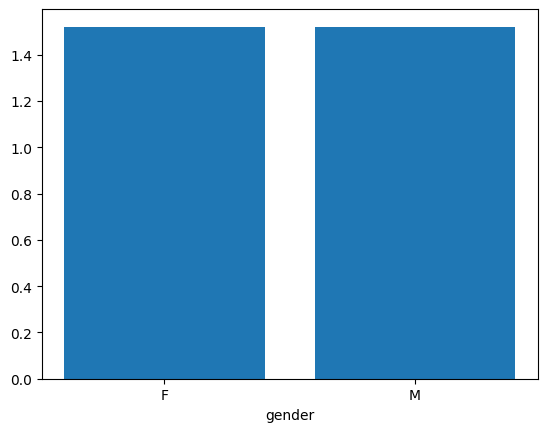

--------------------------------------------------


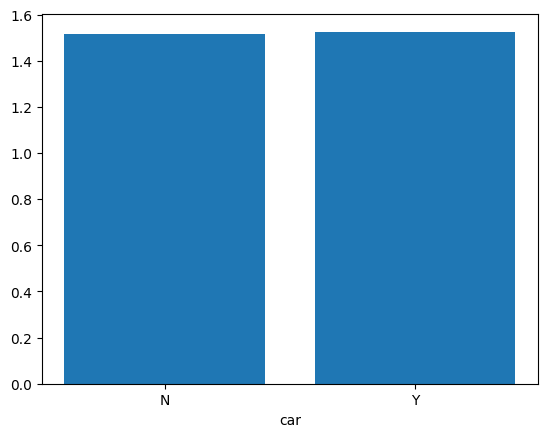

--------------------------------------------------


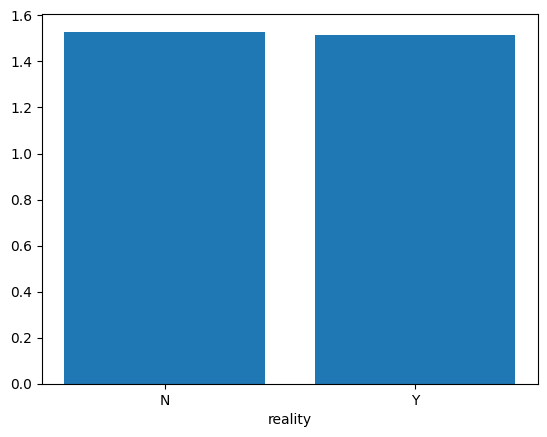

--------------------------------------------------


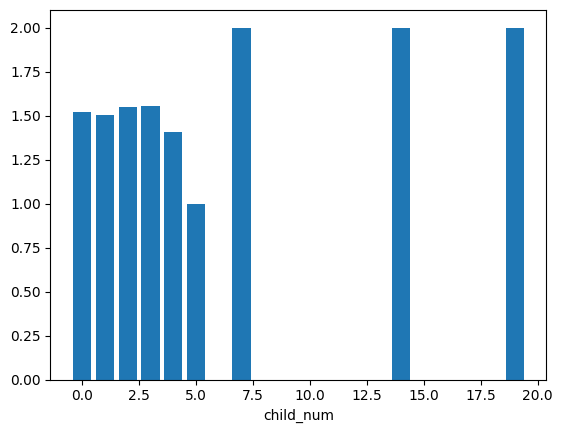

--------------------------------------------------


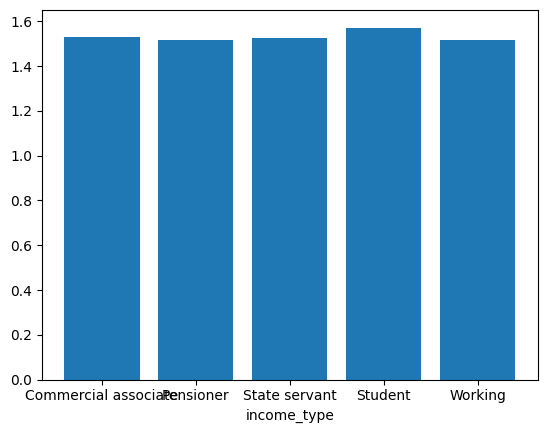

--------------------------------------------------


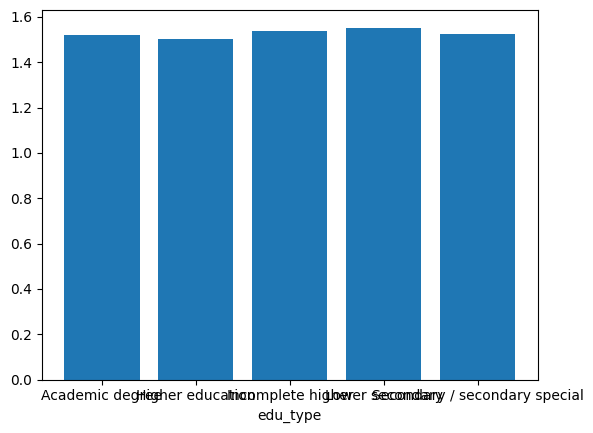

--------------------------------------------------


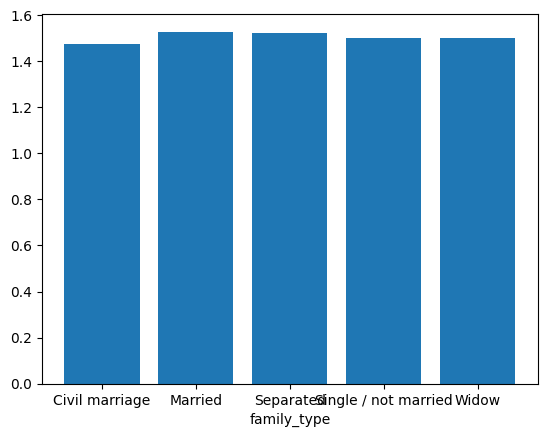

--------------------------------------------------


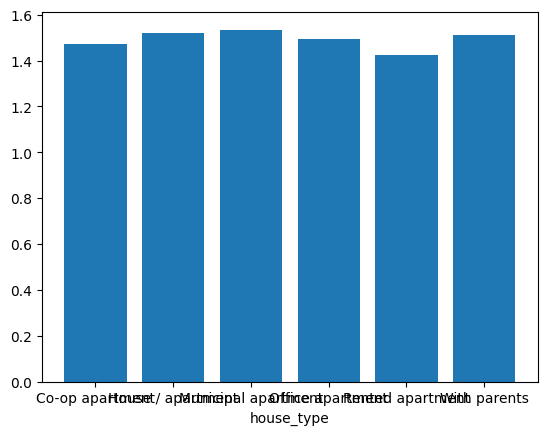

--------------------------------------------------


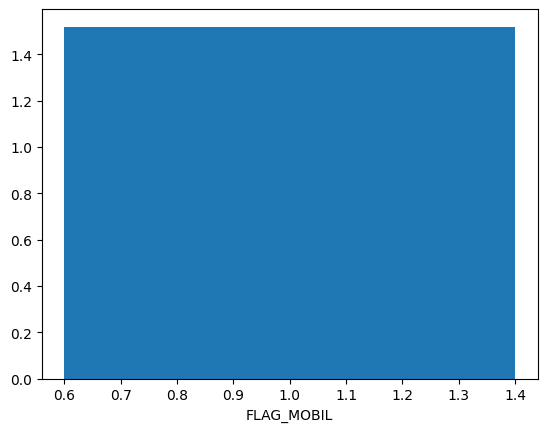

--------------------------------------------------


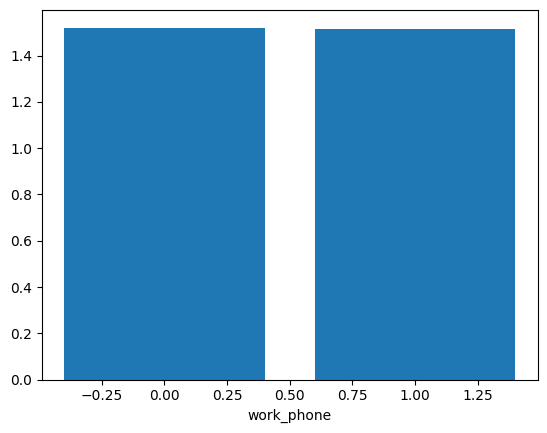

--------------------------------------------------


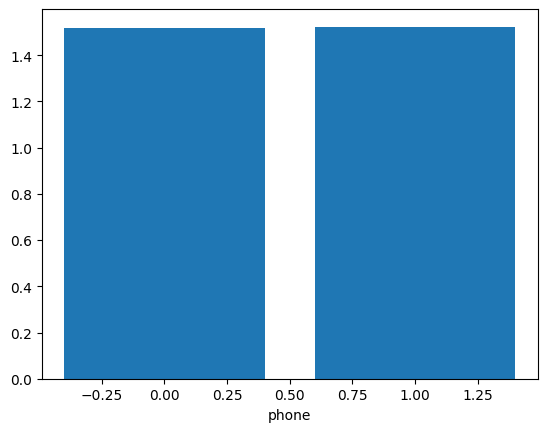

--------------------------------------------------


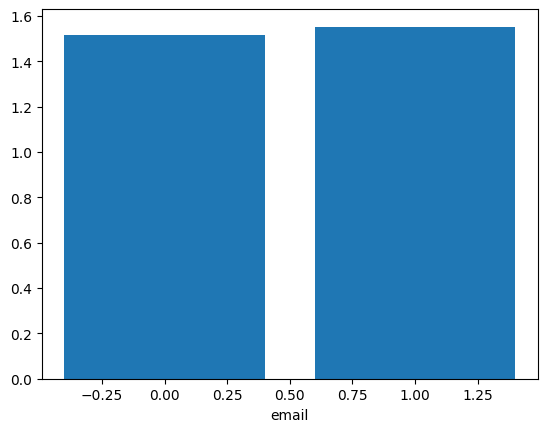

--------------------------------------------------


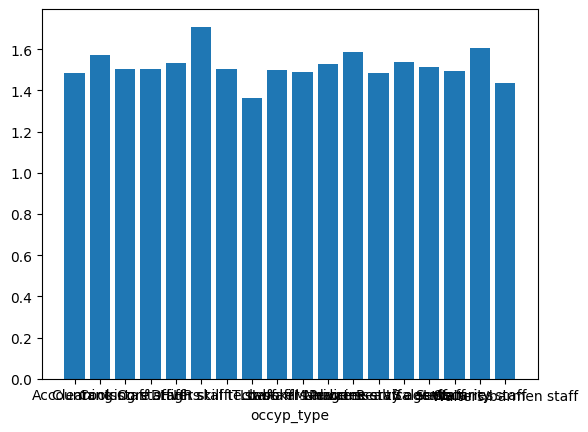

--------------------------------------------------


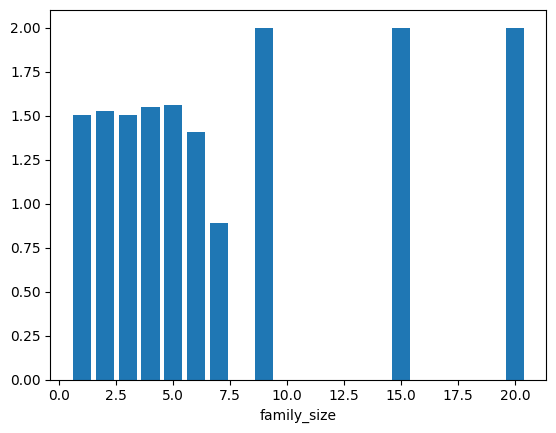

--------------------------------------------------


In [103]:
## 유의미한 정보는 못얻음
import matplotlib.pyplot as plt

for i in categorys:
    x = test[[i, 'credit']].groupby(i,as_index=False).mean()
    plt.bar(x[i],x['credit'])
    plt.xlabel(i)
    plt.show()
    
    print('-'*50)

#### 성별 별 총 수입

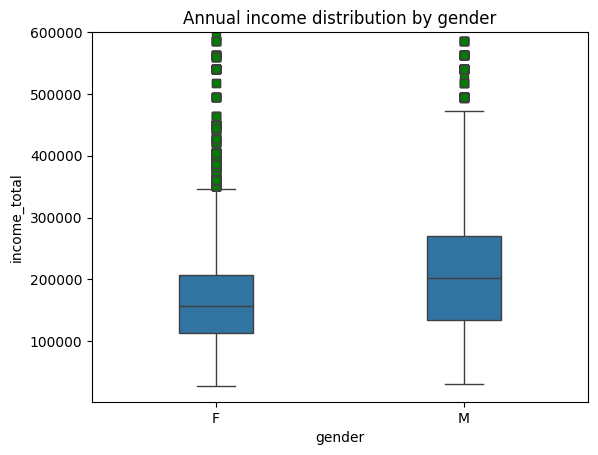

In [108]:
import seaborn as sns

green = dict(markerfacecolor='g', marker='s')
sns.boxplot(data=df,y="income_total",x='gender', width=0.3,flierprops=green)
plt.title('Annual income distribution by gender')
plt.ylim(2000, 600000)
plt.show()

#### creadit

신용 안좋은 사람이 제일 많다

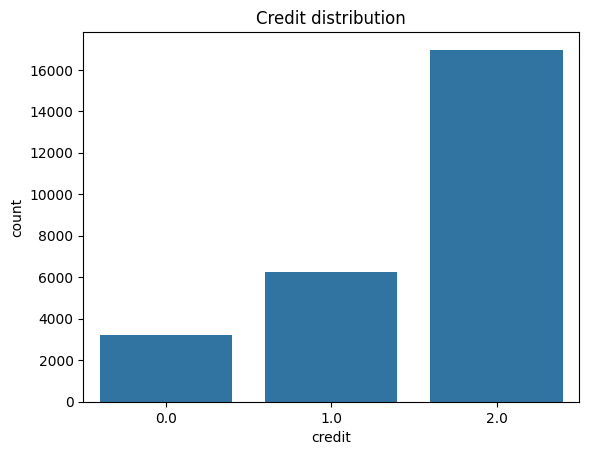

In [113]:
sns.countplot(data=df, x="credit")
plt.title('Credit distribution')
plt.show()

#### 나이 변환

In [116]:
import numpy as np
df['new_age'] = round(abs(df['DAYS_BIRTH'])/365.5,0).astype(np.int32)

In [122]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,38
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,31
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,52
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,41
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,41


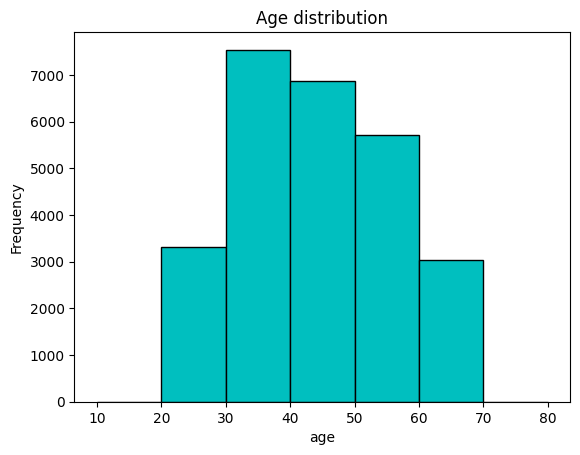

In [127]:
# 나중에 구간 별로 봐도 좋을 것 같다
df['new_age'].plot.hist(bins=range(10,81,10),color='c', edgecolor='k')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

In [141]:
cond1 = df[df['car']=='N']
cond2 = df[df['car']=='Y']

<Axes: xlabel='credit', ylabel='Count'>

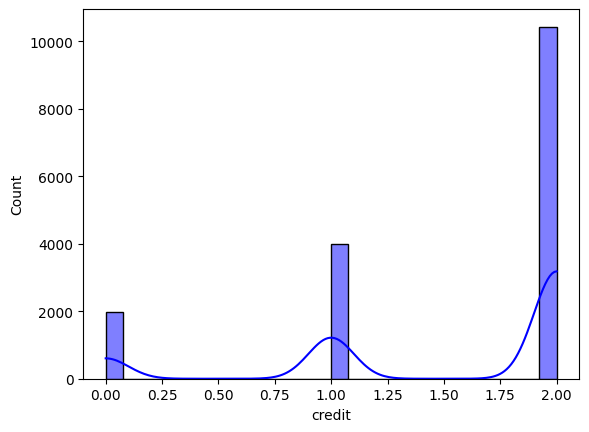

In [142]:
sns.histplot(cond1['credit'], color='blue', label='Car N', kde=True)

<Axes: xlabel='credit', ylabel='Count'>

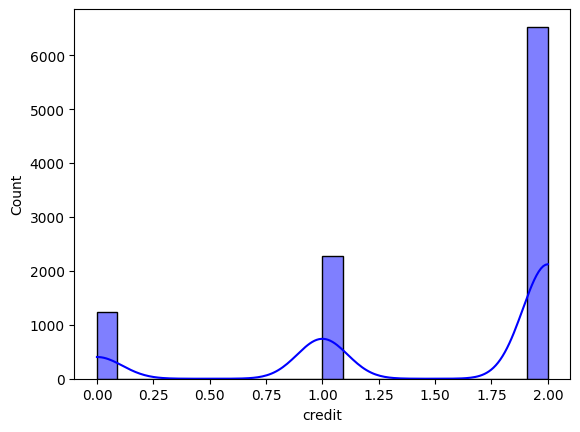

In [143]:
sns.histplot(cond2['credit'], color='blue', label='Car N', kde=True)

## 종합?

- Credit(종속 변수) 시각화
    - 2인 사람들이 많다.
    - 그룹 간 데이터가 불균형하다.

- Gender에서 F가 더 많다.
    - 성별에 따라 총 수입이 다를 것이다. -> Box Plot

    
- work_phone이 1이면 credit이 낮을 것이다.
    - 업무용 폰을 가지고 있으면 신용 비율이 높을 것이다.

- 나이 구간은 30~40대가 많다
    - 나이 구간 별로 총 수입이 다를 것이다.
    
    
- 부동산 소유 여부에 따라 수입이 다를 것이다.

- child num 하고 family size에 이상치가 존재한다.

- 수치 데이터를 살펴 보았을때, income_total, DAYS,EMPLOYED, family_size 등은 데이터가 skew 돼있기 때문에 정규화 시켜준다. 
    로그 변환을 하지 않은 이유는 음수(-) 값이 있기때문에 적용하지 않았다.

    
- 로그 변환, 이상치 제거 등으로 모델 성능을 향상? 할 수 있는 가능성이 있겠다.

- income_mean: 소득/ 가족 수
- ability: 소득/(살아온 일수+ 근무일수)


In [5]:
df["DAYS_BIRTH"]

0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

In [ ]:
shapiro.test(resid(out))

In [147]:
df['gender'].value_counts()

gender
F    17697
M     8760
Name: count, dtype: int64